# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangody
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | kapuskasing
Processing Record 4 of Set 1 | shancheng
Processing Record 5 of Set 1 | ashland
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | mbuji-mayi
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | nyurba
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | charters towers
Processing Record 16 of Set 1 | upper hutt
Processing Record 17 of Set 1 | novyy urgal
Processing Record 18 of Set 1 | kirakira
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | treinta y tres
Processing Record 21 of Set 1 | kone
Processing Record 22 of Set 1 | namdrik
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame\
print(city_weather)
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

{'coord': {'lon': -14.2967, 'lat': 10.9409}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.81, 'feels_like': 35.19, 'temp_min': 30.81, 'temp_max': 30.81, 'pressure': 1012, 'humidity': 63, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 231, 'gust': 1.82}, 'clouds': {'all': 71}, 'dt': 1720530320, 'sys': {'country': 'GN', 'sunrise': 1720507224, 'sunset': 1720553047}, 'timezone': 0, 'id': 2422924, 'name': 'Boké', 'cod': 200}


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangody,65.8500,74.4859,19.54,40,100,7.58,RU,1720528808
1,bethel,41.3712,-73.4140,26.04,90,0,1.54,US,1720528428
2,kapuskasing,49.4169,-82.4331,16.05,100,100,4.12,CA,1720528560
3,shancheng,34.7953,116.0817,24.05,82,37,1.85,CN,1720528811
4,ashland,40.8167,-82.2665,24.04,97,100,1.45,US,1720528812


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangody,65.8500,74.4859,19.54,40,100,7.58,RU,1720528808
1,bethel,41.3712,-73.4140,26.04,90,0,1.54,US,1720528428
2,kapuskasing,49.4169,-82.4331,16.05,100,100,4.12,CA,1720528560
3,shancheng,34.7953,116.0817,24.05,82,37,1.85,CN,1720528811
4,ashland,40.8167,-82.2665,24.04,97,100,1.45,US,1720528812


In [13]:
# Look at data statistics
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.071815,19.395960,22.710877,67.595707,55.182469,3.564758,1.720529e+09
std,32.259872,90.927115,8.826911,25.282300,41.739622,2.432838,5.911702e+02
min,-54.800000,-178.166700,-2.460000,4.000000,0.000000,0.000000,1.720528e+09
25%,-8.689450,-60.238650,17.365000,54.000000,8.000000,1.670000,1.720529e+09
50%,21.066700,24.464300,24.040000,76.000000,69.000000,3.090000,1.720529e+09
75%,45.594100,98.709850,28.260000,87.000000,100.000000,5.045000,1.720530e+09
max,78.218600,178.441500,47.100000,100.000000,100.000000,13.890000,1.720530e+09


## Create the Scatter Plots Requested

#### Latitude Vs. Temperature

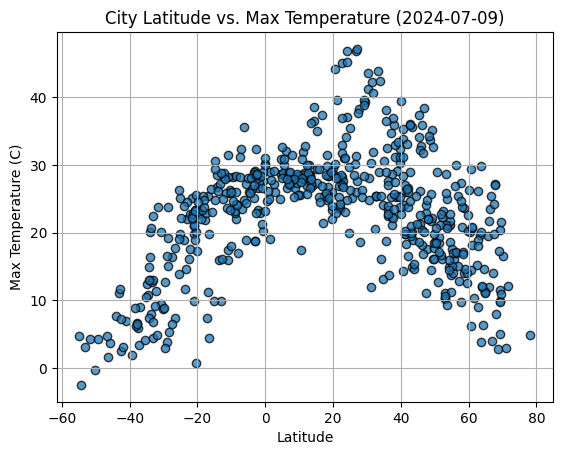

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

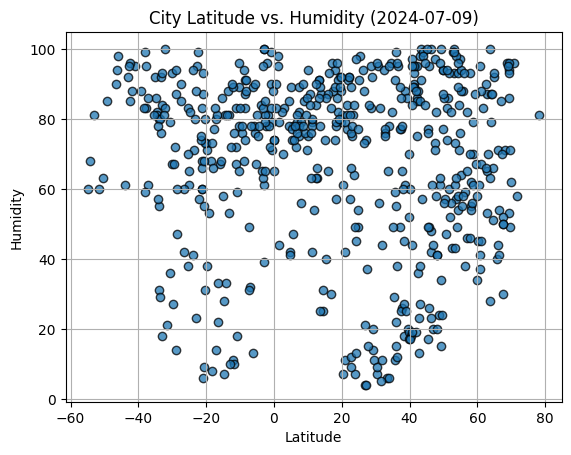

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

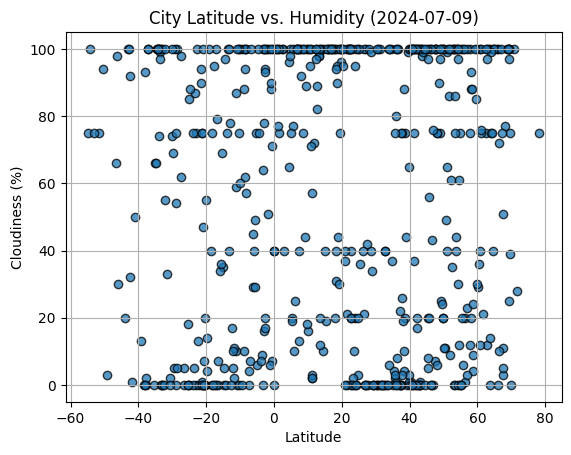

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

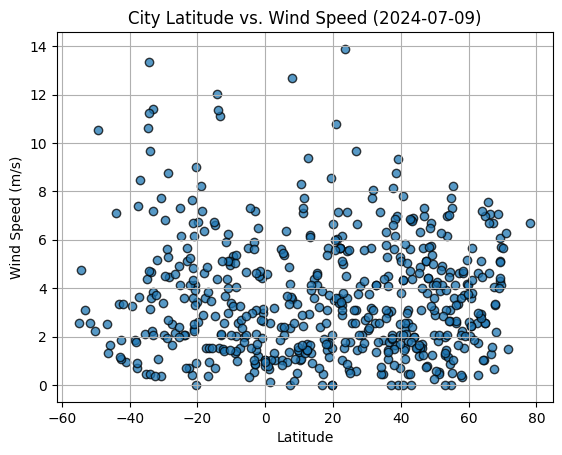

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## ---

## Requirement 2: Compute Linear Regression for Each Relationship


In [134]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_cord, y_cord, x_label, y_label, title, output_file):

    # Linear Regression
    (slope, intercept, rvalue, pvalue, std) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o')

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the linear equation and r-value
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_cord, y_cord), fontsize=15, color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout() 

    # Save the figure
    plt.savefig(output_file)

    # Print the r value
    print(f"The r^2 value is {rvalue**2}")
    
    # Show plot
    plt.show()

In [135]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangody,65.8500,74.4859,19.54,40,100,7.58,RU,1720528808
1,bethel,41.3712,-73.4140,26.04,90,0,1.54,US,1720528428
2,kapuskasing,49.4169,-82.4331,16.05,100,100,4.12,CA,1720528560
3,shancheng,34.7953,116.0817,24.05,82,37,1.85,CN,1720528811
4,ashland,40.8167,-82.2665,24.04,97,100,1.45,US,1720528812


In [136]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,tolanaro,-25.0319,46.9987,25.04,61,0,4.12,MG,1720528814
6,mbuji-mayi,-6.1500,23.6000,35.59,13,29,1.99,CD,1720528815
7,port-aux-francais,-49.3500,70.2167,4.34,85,3,10.55,TF,1720528256
11,bredasdorp,-34.5322,20.0403,10.85,82,100,10.63,ZA,1720528463
12,blackmans bay,-43.0167,147.3167,11.07,92,100,3.35,AU,1720528382


### Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.3071319559286697


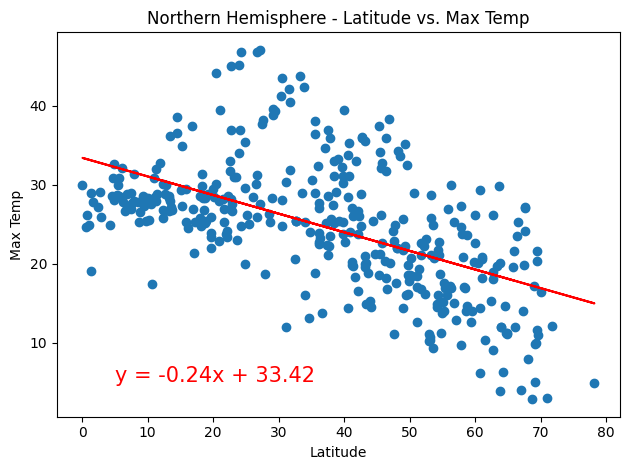

In [137]:
# Northern Hemisphere - Max Temp, Figure 5
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 5, 5, 'Latitude', 
                       'Max Temp', 'Northern Hemisphere - Latitude vs. Max Temp', 'output_data/Fig5.png')

The r^2 value is 0.6323071222920905


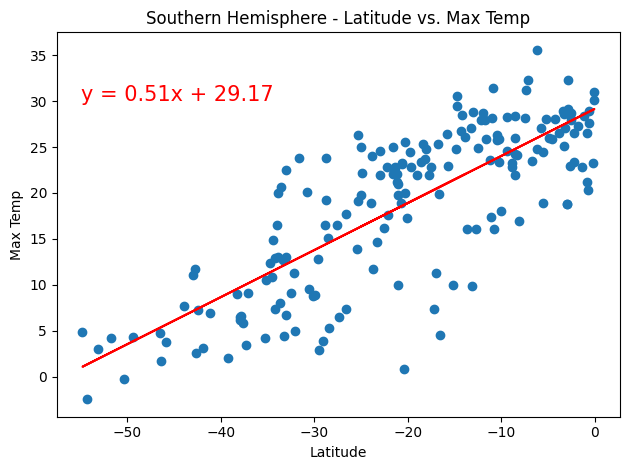

In [138]:
# Southern Hemisphere - Max Temp, Figure 6
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -55, 30, 'Latitude', 
                       'Max Temp', 'Southern Hemisphere - Latitude vs. Max Temp', 'output_data/Fig6.png')

**Discussion about the linear relationship:** Both the Northern Hemisphere plot and Southern Hemisphere plot show some correlation between Latitude and Humidity. In the Northern Hemisphere plot, there is a negative relationship between Latitude and Max Temp, where as Latitude increases, Max Temp decreases. This is the reverse for the Southern Hemisphere, where there is a positive relationship between Latitude and Max Temp. Furthermore, Southern Hemisphere has a stronger correlation, indicated by the higher slope (x) value. Additionally, the data fits the linear regression model better for the Southern Hemisphere, indicated by the higher r^2 value.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.003371262352124503


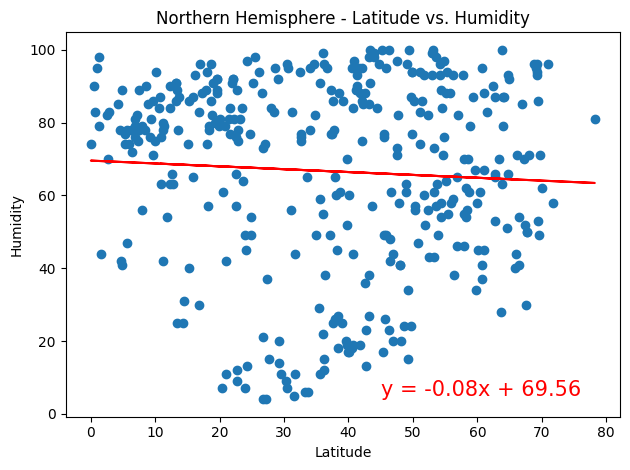

In [139]:
# Northern Hemisphere - Humidity, Figure 7
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 45, 5, 'Latitude', 
                       'Humidity', 'Northern Hemisphere - Latitude vs. Humidity', 'output_data/Fig7.png')

The r^2 value is 0.0016806625263464908


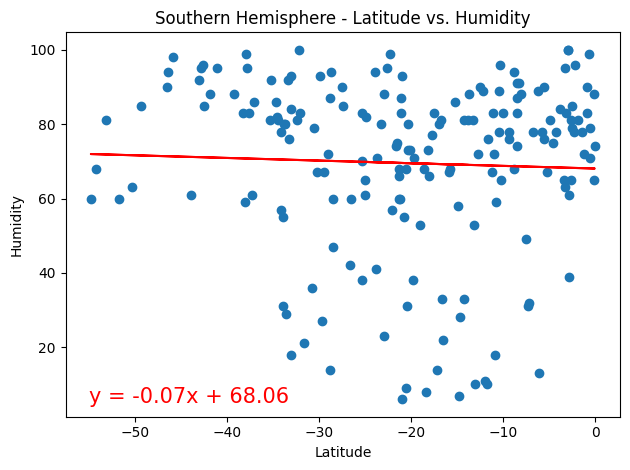

In [140]:
# Southern Hemisphere - Humidity, Figure 8
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -55, 5, 'Latitude', 
                       'Humidity', 'Southern Hemisphere - Latitude vs. Humidity', 'output_data/Fig8.png')

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.005841578340037041


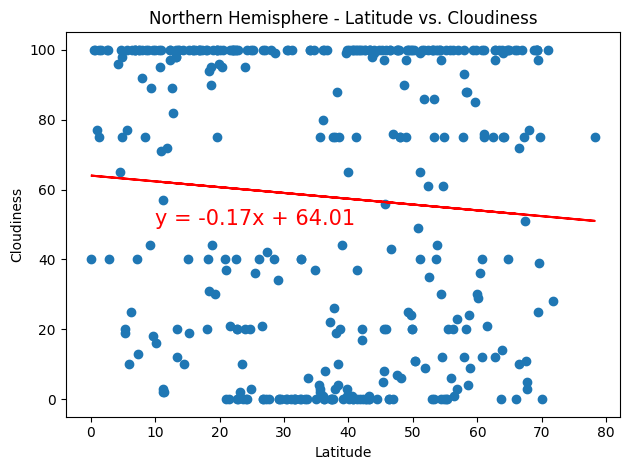

In [141]:
# Northern Hemisphere - Cloudiness, Figure 9
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 10, 50, 'Latitude', 
                       'Cloudiness', 'Northern Hemisphere - Latitude vs. Cloudiness', 'output_data/Fig9.png')

The r^2 value is 0.0009499229645913303


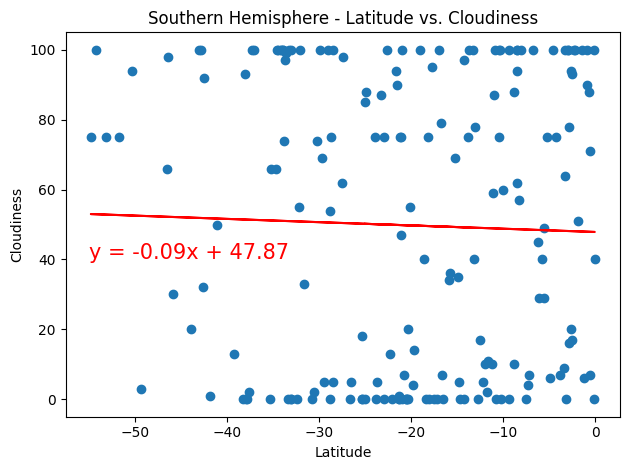

In [142]:
# Southern Hemisphere - Cloudiness, Figure 10
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -55, 40, 'Latitude', 
                       'Cloudiness', 'Southern Hemisphere - Latitude vs. Cloudiness', 'output_data/Fig10.png')

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.005953039461878021


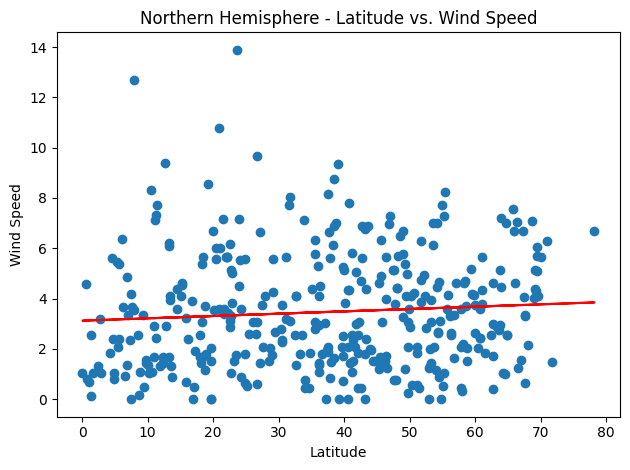

In [143]:
# Northern Hemisphere - Wind Speed, Figure 11
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], -25, 10, 'Latitude', 
                       'Wind Speed', 'Northern Hemisphere - Latitude vs. Wind Speed', 'output_data/Fig11.png')

The r^2 value is 0.011112090519826997


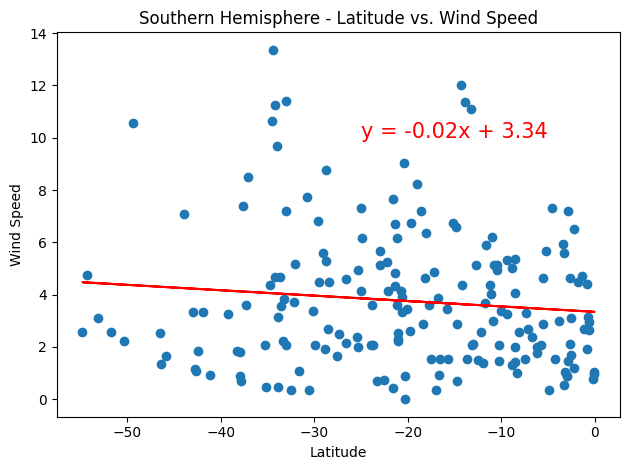

In [144]:
# Southern Hemisphere - Wind Speed, Figure 12
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -25, 10, 'Latitude', 
                       'Wind Speed', 'Southern Hemisphere - Latitude vs. Wind Speed', 'output_data/Fig12.png')